### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Combined Graph

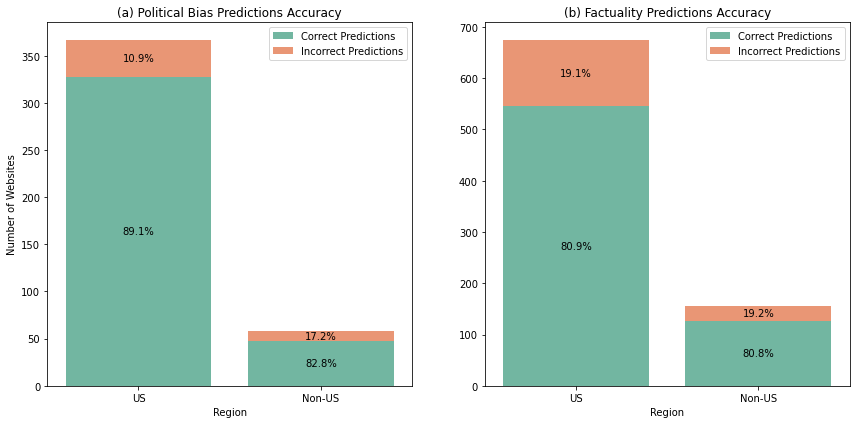

In [2]:
# Load the factuality data
df_factuality = pd.read_csv('factuality_predictions_with_country.csv')
# Load the bias data
df_bias = pd.read_csv('bias_predictions_with_country.csv')

# Process data for bias
df_us_bias = df_bias[df_bias['country'].str.contains('USA|United States|US')]
df_non_us_bias = df_bias[~df_bias['country'].str.contains('USA|United States|US')]

correct_us_bias = df_us_bias['bias_label_3_class'] == df_us_bias['predicted_bias']
correct_non_us_bias = df_non_us_bias['bias_label_3_class'] == df_non_us_bias['predicted_bias']

correct_us_bias_count = correct_us_bias.sum()
incorrect_us_bias_count = len(df_us_bias) - correct_us_bias_count

correct_non_us_bias_count = correct_non_us_bias.sum()
incorrect_non_us_bias_count = len(df_non_us_bias) - correct_non_us_bias_count

bias_correct_counts = [correct_us_bias_count, correct_non_us_bias_count]
bias_incorrect_counts = [incorrect_us_bias_count, incorrect_non_us_bias_count]
bias_total_counts = [len(df_us_bias), len(df_non_us_bias)]

# Process data for factuality
df_us_factuality = df_factuality[df_factuality['country'].str.contains('USA|United States|US')]
df_non_us_factuality = df_factuality[~df_factuality['country'].str.contains('USA|United States|US')]

correct_us_factuality = df_us_factuality['factuality'] == df_us_factuality['predicted_factuality']
correct_non_us_factuality = df_non_us_factuality['factuality'] == df_non_us_factuality['predicted_factuality']

correct_us_factuality_count = correct_us_factuality.sum()
incorrect_us_factuality_count = len(df_us_factuality) - correct_us_factuality_count

correct_non_us_factuality_count = correct_non_us_factuality.sum()
incorrect_non_us_factuality_count = len(df_non_us_factuality) - correct_non_us_factuality_count

factuality_correct_counts = [correct_us_factuality_count, correct_non_us_factuality_count]
factuality_incorrect_counts = [incorrect_us_factuality_count, incorrect_non_us_factuality_count]
factuality_total_counts = [len(df_us_factuality), len(df_non_us_factuality)]

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Reduced figure size for tighter layout

# Plot bias predictions on the left
sns.barplot(x=['US', 'Non-US'], y=bias_correct_counts, palette=['#66c2a5'], ax=axes[0], label='Correct Predictions')
sns.barplot(x=['US', 'Non-US'], y=bias_incorrect_counts, palette=['#fc8d62'], ax=axes[0], bottom=bias_correct_counts, label='Incorrect Predictions')

for i, (correct, incorrect, total) in enumerate(zip(bias_correct_counts, bias_incorrect_counts, bias_total_counts)):
    # Correct percentage
    axes[0].text(i, correct / 2, f'{100 * correct / total:.1f}%', ha='center', va='center', color='black', fontsize=10)
    # Incorrect percentage
    axes[0].text(i, correct + (incorrect / 2), f'{100 * incorrect / total:.1f}%', ha='center', va='center', color='black', fontsize=10)

axes[0].set_title('(a) Political Bias Predictions Accuracy')
axes[0].set_ylabel('Number of Websites')
axes[0].set_xlabel('Region')
axes[0].legend(loc='upper right')

# Plot factuality predictions on the right
sns.barplot(x=['US', 'Non-US'], y=factuality_correct_counts, palette=['#66c2a5'], ax=axes[1], label='Correct Predictions')
sns.barplot(x=['US', 'Non-US'], y=factuality_incorrect_counts, palette=['#fc8d62'], ax=axes[1], bottom=factuality_correct_counts, label='Incorrect Predictions')

for i, (correct, incorrect, total) in enumerate(zip(factuality_correct_counts, factuality_incorrect_counts, factuality_total_counts)):
    # Correct percentage
    axes[1].text(i, correct / 2, f'{100 * correct / total:.1f}%', ha='center', va='center', color='black', fontsize=10)
    # Incorrect percentage
    axes[1].text(i, correct + (incorrect / 2), f'{100 * incorrect / total:.1f}%', ha='center', va='center', color='black', fontsize=10)

axes[1].set_title('(b) Factuality Predictions Accuracy')
axes[1].set_xlabel('Region')
axes[1].legend(loc='upper right')

# Reduce the space between plots
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)  # Reduced spacing between the plots

# Save or show the plot
# plt.savefig('media_by_region.png', dpi=300)  # Save the figure
plt.show()


